# Import Libraries and crawled data

In [1]:
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('tables.csv')

In [3]:
df

,team_title,team_id,game_count,points,uefa_status,team_performance
0,Manchester City,281,38,93,True,2.447368
1,Liverpool FC,31,38,92,True,2.421053
2,Chelsea FC,631,38,74,True,1.947368
3,Tottenham Hotspur,148,38,71,False,1.868421
4,Arsenal FC,11,38,69,False,1.815789
...,...,...,...,...,...,...
89,RCD Mallorca,237,38,39,False,1.026316
90,Cádiz CF,2687,38,39,False,1.026316
91,Granada CF,16795,38,38,False,1.000000
92,Levante UD,3368,38,35,False,0.921053


# Add cleansheet for each team

In [4]:
team_claensheet = pd.read_csv('team_claensheet_seasion(20-21).csv')

In [5]:
team_claensheet

,team_id,cleansheets,team_title
0,281,12,Manchester City
1,631,11,Chelsea FC
2,31,11,Liverpool FC
3,148,10,Tottenham Hotspur
4,5,10,AC Milan
5,667,9,RC Strasbourg Alsace
6,6195,8,SSC Napoli
7,12,8,AS Roma
8,398,7,SS Lazio
9,11,7,Arsenal FC


In [6]:
new_df = pd.merge(df, team_claensheet, left_on='team_id', right_on='team_id', how = "left").fillna(0).drop(columns=['team_title_y'])
new_df.rename(columns={'team_title_x':'team_title'}, inplace=True)

In [7]:
# matches counts aren't same in each league
new_df['team_perf_by_cleansheets'] = new_df.cleansheets/new_df.game_count

# Standardize metrics

In [8]:
new_df.team_performance = (new_df.team_performance - new_df.team_performance.mean())/new_df.team_performance.std()
new_df.team_perf_by_cleansheets = (new_df.team_perf_by_cleansheets - new_df.team_perf_by_cleansheets.mean())/new_df.team_perf_by_cleansheets.std()

In [9]:
new_df

,team_title,team_id,game_count,points,uefa_status,team_performance,cleansheets,team_perf_by_cleansheets
0,Manchester City,281,38,93,True,2.348767,12.0,2.968925
1,Liverpool FC,31,38,92,True,2.291345,11.0,2.642898
2,Chelsea FC,631,38,74,True,1.257745,11.0,2.642898
3,Tottenham Hotspur,148,38,71,False,1.085478,10.0,2.316871
4,Arsenal FC,11,38,69,False,0.970633,7.0,1.338791
...,...,...,...,...,...,...,...,...
89,RCD Mallorca,237,38,39,False,-0.752034,0.0,-0.943397
90,Cádiz CF,2687,38,39,False,-0.752034,0.0,-0.943397
91,Granada CF,16795,38,38,False,-0.809456,0.0,-0.943397
92,Levante UD,3368,38,35,False,-0.981723,0.0,-0.943397


# Sort values by cleansheet metric

In [10]:
new_df.sort_values(by='team_perf_by_cleansheets', ascending=False, inplace=True)

# EDA

In [11]:
new_df.describe()

,team_id,game_count,points,team_performance,cleansheets,team_perf_by_cleansheets
count,94.000000,94.000000,94.000000,9.400000e+01,94.000000,9.400000e+01
mean,1967.095745,36.212766,49.617021,-7.086530e-18,2.893617,-2.527529e-16
std,6520.437973,4.295214,17.454153,1.000000e+00,3.067233,1.000000e+00
min,5.000000,26.000000,13.000000,-1.900479e+00,0.000000,-9.433967e-01
25%,370.750000,38.000000,37.250000,-7.520341e-01,0.000000,-9.433967e-01
50%,682.000000,38.000000,46.500000,-1.491005e-01,3.000000,3.468370e-02
75%,1129.750000,38.000000,62.000000,6.691666e-01,4.750000,6.052306e-01
max,60949.000000,38.000000,93.000000,2.463612e+00,12.000000,2.968925e+00


In [12]:
print('Number of UEFA member clubs:', len(new_df[new_df.uefa_status == True]))
print('Number of other clubs:', len(new_df[new_df.uefa_status == False]))

Number of UEFA member clubs: 15
Number of other clubs: 79


Because of different club number of lgeaues, metric(team_performance) has calculated as season points divided by league club number

# Split teams and create sample data

In [13]:
# for metric points (pt)
group1_pt = new_df[new_df.uefa_status == True].team_performance
group2_pt = new_df[new_df.uefa_status == False].team_performance

In [14]:
# for metric cleansheets (cs)
group1_cs = new_df[new_df.uefa_status == True].team_perf_by_cleansheets
group2_cs = new_df[new_df.uefa_status == False].team_perf_by_cleansheets

# Perform two-sample t-test with different sample sizes

In [15]:
# for metric points (pt)
t_pt_statistic, p_pt_value = stats.ttest_ind(group1_pt, group2_pt, equal_var=False)

print('for metric points (pt)')
print("t-statistic:", t_pt_statistic)
print("p-value:", p_pt_value)

pt_diff_ratio = (1-p_pt_value)*100

for metric points (pt)
t-statistic: 7.137643702822161
p-value: 4.1210618748178677e-07


In [16]:
# for metric cleansheets (cs)
t_cs_statistic, p_cs_value = stats.ttest_ind(group1_cs, group2_cs, equal_var=False)

print('for metric cleansheets (cs)')
print("t-statistic:", t_cs_statistic)
print("p-value:", p_cs_value)

cs_diff_ratio = round((1-p_cs_value)*100,2)

for metric cleansheets (cs)
t-statistic: 1.8401230172815044
p-value: 0.08451674500887912


In [17]:
print('Considernig metric points, As', pt_diff_ratio, 'percent, performance of two teams are different.')
print('Considernig metric cleansheet, As', cs_diff_ratio, 'percent, performance of two teams are different.')

Considernig metric points, As 99.99995878938125 percent, performance of two teams are different.
Considernig metric cleansheet, As 91.55 percent, performance of two teams are different.


# Draw plots and negotitate results

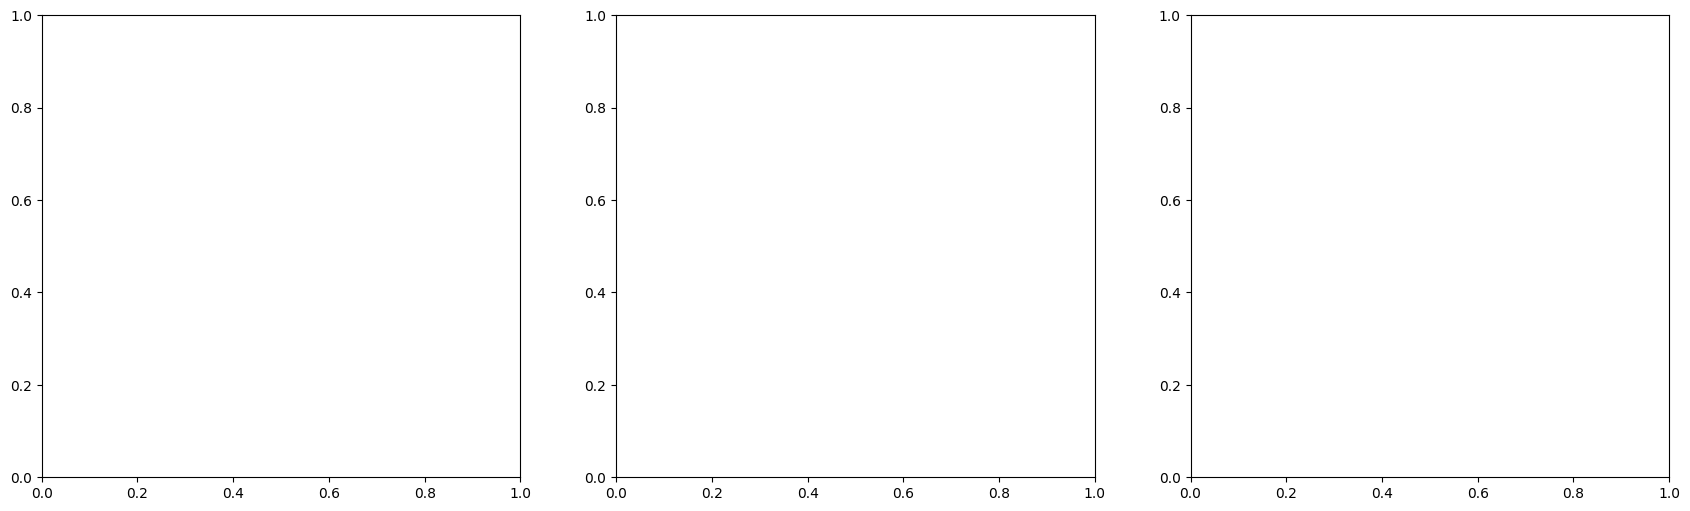

In [18]:
fig, ax = plt.subplots(1,3, figsize=(21,6))

In [19]:
# create x data to compute probiblity
xmin , xmax = min(group1_pt.min(), group2_pt.min()), max(group1_pt.max(), group2_pt.max(),3)
x = np.linspace(xmin, xmax, 100)

In [20]:
p1 = stats.norm.pdf(x, np.mean(group1_pt), np.std(group1_pt))
p2 = stats.norm.pdf(x, np.mean(group2_pt), np.std(group2_pt))
ax[0].plot(x, p1, 'b', label = 'UEFA_teams')
ax[0].plot(x, p2, 'r', label = 'others')
ax[0].set_title('Comparison of UEFA teams vs not UEFA temas\npoints score (normal distribution)')
ax[0].legend()
ax[0].set_xlabel('As '+str(pt_diff_ratio)+' percent, performance of two teams are different.')

Text(0.5, 4.444444444444452, 'As 99.99995878938125 percent, performance of two teams are different.')

In [21]:
# create x data to compute probiblity
xmin , xmax = min(group1_cs.min(), group2_cs.min(), -2), max(group1_cs.max(), group2_cs.max())
x = np.linspace(xmin, xmax, 100)

In [22]:
p1 = stats.norm.pdf(x, np.mean(group1_cs), np.std(group1_cs))
p2 = stats.norm.pdf(x, np.mean(group2_cs), np.std(group2_cs))
ax[2].plot(x, p1, 'b', label = 'UEFA_teams')
ax[2].plot(x, p2, 'r', label = 'others')
ax[2].set_title('Comparison of UEFA teams vs not UEFA temas\ncleansheets score (normal distribution)')
ax[2].legend()
ax[2].set_xlabel('As '+str(cs_diff_ratio)+' percent, performance of two teams are different.')

Text(0.5, 4.444444444444452, 'As 91.55 percent, performance of two teams are different.')

In [23]:
new_df.sort_values(by='team_perf_by_cleansheets', ascending=False).reset_index(drop=True).team_performance.plot(ax=ax[1], color='blue', label='by points')
new_df.sort_values(by='team_perf_by_cleansheets', ascending=False).reset_index(drop=True).team_perf_by_cleansheets.plot(ax=ax[1], color='red', label='by cleansheets')
ax[1].set_title('Comparison of teams performance metrics')
ax[1].set_ylabel('standardized performance metric')
ax[1].set_xlabel('correlation between two metrics is: '+str(round(new_df.team_performance.corr(new_df.team_perf_by_cleansheets),2)))
ax[1].legend()

In [24]:
fig.show()

C:\Users\hosbe\AppData\Local\Temp\ipykernel_17476\89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [25]:
fig.savefig('hypothesis2_result.png')